In [8]:
# "Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples
    # the compression and decompression functions are implemented with neural networks
    # data-specific = can only compress data similar to what it's been trained on
    # lossy = decompressed outputs are degraded compared to the original inputs
    # learned automatically = easy to train specialized instances of the algorithm that perform will on a specific type of input

# to build an autoencoder: encoding function, decoding function, and a distance function between the amount of info loss between compressed representation of data and decompressed representation

# some applications are data denoising and dimensionality reduction for data visualization

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
# encoder and decoder are single fully-connected layers
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [10]:
# This model maps an input to its encoded representation
# encoder model
encoder = keras.Model(input_img, encoded)

In [11]:
# This is our encoded (32-dimensional) input
# decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [12]:
# use the binary crossentropy loss function and Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
# input data
from tensorflow.keras.datasets import mnist
import numpy as np
# discard the labels since it's only interested in encoding/decoding the input images
(x_train, _), (x_test, _) = mnist.load_data()

# normalize values between 0 and 1, and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
# train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.3856 - val_loss: 0.18830s - loss: 
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1782 - val_loss: 0.1528
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1488 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1318 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1205 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1130 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1078 - val_loss: 0.1034
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1040 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1005 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0981 - val_l

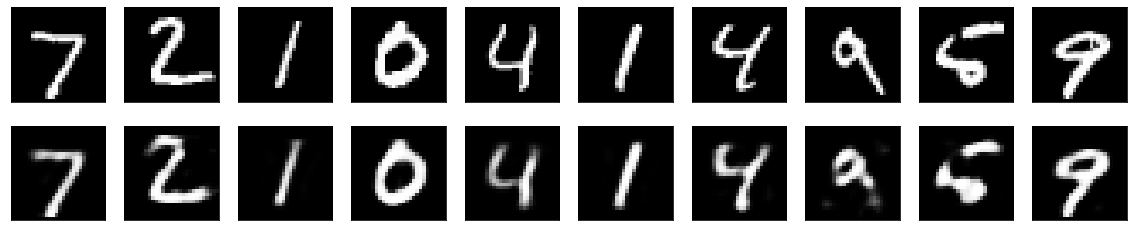

In [15]:
# visualize the reconstructed inputs and the encoded representations with matplotlib
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# top row is original digits, bottom row is reconstructed digits

In [18]:
# adding a sparsity constraint on the encoded representations
    # means that fewer units fire at a given time
    # done through adding an activity_regularizer to the Dense layer in Keras
from tensorflow.keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.3935 - val_loss: 0.1944
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1856 - val_loss: 0.1614
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1576 - val_loss: 0.1421
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1405 - val_loss: 0.1308
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1299 - val_loss: 0.1231
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1230 - val_loss: 0.1178
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1179 - val_loss: 0.1137
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1142 - val_loss: 0.1107
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1114 - val_loss: 0.1086
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1094 - val_lo

235/235 [==============================] - 1s 5ms/step - loss: 0.0974 - val_loss: 0.0964
Epoch 82/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0973 - val_loss: 0.0964
Epoch 83/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0975 - val_loss: 0.0963
Epoch 84/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0974 - val_loss: 0.0963
Epoch 85/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 86/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0973 - val_loss: 0.0962
Epoch 87/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0976 - val_loss: 0.0962
Epoch 88/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0972 - val_loss: 0.0962
Epoch 89/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0972 - val_loss: 0.0962
Epoch 90/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0972 - val_loss: 

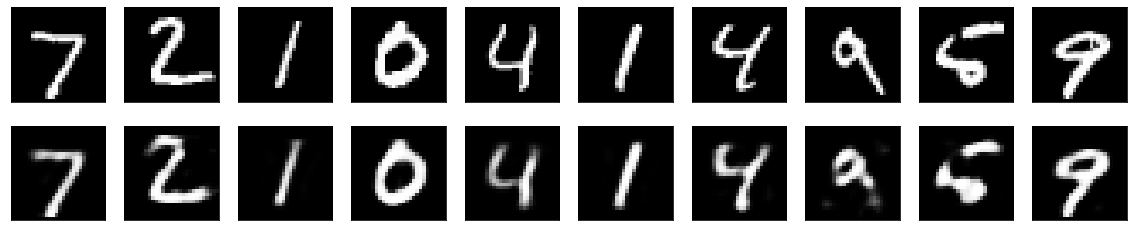

In [19]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# top row is original digits, bottom row is reconstructed digits

# Deep autoencoder

In [20]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3349 - val_loss: 0.1628
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1543 - val_loss: 0.1338
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1309 - val_loss: 0.1213
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1206 - val_loss: 0.1145
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1143 - val_loss: 0.1096
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1099 - val_loss: 0.1063
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1067 - val_loss: 0.1033
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1041 - val_loss: 0.1014
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1019 - val_loss: 0.0994
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1003 - val_lo

235/235 [==============================] - 3s 11ms/step - loss: 0.0811 - val_loss: 0.0810
Epoch 82/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0808 - val_loss: 0.0807
Epoch 83/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0807 - val_loss: 0.0806
Epoch 84/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0808 - val_loss: 0.0807
Epoch 85/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0809 - val_loss: 0.0805
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0807 - val_loss: 0.0805
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0808 - val_loss: 0.0806
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0808 - val_loss: 0.0804
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0808 - val_loss: 0.0808
Epoch 90/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0805 - 

# Convolutional autoencoder

In [21]:
# in real life, autoencoders applied to images are always convolutional autoencoders
# the encoder = stack of Conv2D and MaxPooling2D layers
# the decoder = stack of Conv2D and UpSampling2D layers

from tensorflow import keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
# train it
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 54s 114ms/step - loss: 0.3206 - val_loss: 0.1544
Epoch 2/50
469/469 [==============================] - 56s 120ms/step - loss: 0.1484 - val_loss: 0.1334
Epoch 3/50
469/469 [==============================] - 65s 140ms/step - loss: 0.1318 - val_loss: 0.1239
Epoch 4/50
469/469 [==============================] - 60s 128ms/step - loss: 0.1236 - val_loss: 0.1179
Epoch 5/50
469/469 [==============================] - 62s 132ms/step - loss: 0.1179 - val_loss: 0.1142
Epoch 6/50
469/469 [==============================] - 63s 134ms/step - loss: 0.1143 - val_loss: 0.1115
Epoch 7/50
469/469 [==============================] - 58s 125ms/step - loss: 0.1122 - val_loss: 0.1096
Epoch 8/50
469/469 [==============================] - 64s 137ms/step - loss: 0.1105 - val_loss: 0.1080
Epoch 9/50
469/469 [==============================] - 60s 128ms/step - loss: 0.1086 - val_loss: 0.1071
Epoch 10/50
469/469 [==============================] - 61s 130ms/step - l

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Application to image denoising

In [ ]:
# to generate synthetic noisy digits --> apply a gaussian noise matrix and clip the images between 0-1
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# show the noisy digits
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# use a slightly different model with more filters per layer
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

## Sequence-to-sequence autoencoder

In [ ]:
# if inputs are sequences, instead of vectors or 2D images
# to build a LSTM-based autoencoder
    # 1. use a LSTM encoder to turn the input sequences into a single vector containing info about the entire sequence
            # then repreat this vector n times (n = # of timesteps in the output sequence)
    # 2. run a LSTM decoder to turn this constant sequence into the target sequence

timesteps = ...  # Length of your sequences
input_dim = ... 
latent_dim = ...

inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)


## Variational autoendoer (VAE)

In [ ]:
# a type of autoencoder with added constraints on the encoded representations being learned
    # it learns a latent variable model for its input data
    # turns the input samples x into 2 parameters in a latent space --> z_mean and z_log_sigma
    # then randomly sample similar points z from the latent normal distribution that generates the data through z = z_mean + exp(z_log_sigma) * episilon (a random normal tensor)
    # decoder network maps the latent space points back to the original input data
    # parameters are trained through 2 loss functions
        # reconstruction loss forces the decoded samples to match the initial inputs
        # KL divergence between learned latent and prior distributions as a regularization term

# encoder network: maps inputs to latent distribution parameters
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

# use parameters to sample new similar points from latent space
from tensorflow.keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# map sampled latent points back to reconstructed inputs
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

# train the model with a custom loss function: sum of a reconstruction term and the KL divergence regularization term
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# train VAE on MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [ ]:
# generate new digits
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()